In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import StandardScaler, normalize
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import normalize

In [39]:
print('check status of nb')

check status of nb


In [4]:
df1 = pd.read_csv('data-r1.csv')
df2 = pd.read_csv('data-r2.csv')
df3 = pd.read_csv('data-r3.csv')

In [5]:
df = pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

In [6]:
# df[(df['rn'] >= 321517) & (df['rn'] < 321521)]

In [7]:
# df[(df['rn'] >= 643037) & (df['rn'] < 643039)]

In [8]:
display(df.sample(10))

,review_id,business_id,name,categories,attributes,business_stars,business_reviews,text,stars,useful,funny,cool,count_reviews,true_avg_stars,rn
257626,LKwTjJYczAV3ZeCS7UBFgQ,03jQGGJ2ch0uHTtW-UUUqg,Famous 4th Street Delicatessen,"""Bakeries, Breakfast & Brunch, Delis, Restaura...","{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...",4.0,620,"This place is amazing. First, you get pickles ...",5,0,0,0,811,4.045623,257627
366897,WMsp70sfIR4dck_T3Dvf-g,6AFzUToxt_6rkhkZgFlPSA,In & Out Express Pizza,"""Restaurants, Pizza""","{""RestaurantsTakeOut"": ""True"", ""RestaurantsDel...",2.5,9,"I heart their pizza!!! Thin crust, not greasy...",5,0,1,0,9,2.666667,366898
190535,QLfHKGbAeUayVdCR86sHQg,RQAF6a0akMiot5lZZnMNNw,Dalessandro’s Steaks & Hoagies,"""Sandwiches, Delis, Restaurants, Cheesesteaks""","{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...",4.0,2686,We visited Dalessandro's as a local recommenda...,3,0,0,0,2725,4.206972,190536
777705,loXPNMkLvev3rC7GjXf0rg,1FliMoYQnq72HRxEIPY0_A,Subway,"""Restaurants, Sandwiches, Fast Food""","{""Caters"": ""True"", ""GoodForKids"": ""True"", ""Goo...",2.0,9,"Sandwiches are good, Subway standard, but this...",1,0,0,0,159,2.748428,777706
333233,w2vP-U-zUU1KodtYKyfsLg,qISf5ojuYbD9h71NumGUQA,Han Dynasty,"""Beer, Wine & Spirits, Chinese, Restaurants, F...","{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...",4.0,1474,I've been going to the Han Dynasty in Exton si...,4,1,0,0,2795,3.987478,333234
18939,fF1savMorWjhQHdNOBMC3w,zGD1PUe6bksPqx5XUqGUIQ,Al's Corner Deli and Catering Services,"""Food, Event Planning & Services, Caterers, De...","{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...",4.0,78,I have long been searching the area for a spot...,4,1,0,0,84,4.154762,18940
419563,AZzZddtW96KyI69WQgB6kw,BKdHppZ3APxm4fGiVcEdnQ,King Eye Associates,"""Eyewear & Opticians, Optometrists, Shopping, ...","{""BikeParking"": ""False"", ""BusinessParking"": ""{...",2.0,17,First experience was great. They attended me q...,5,0,0,0,18,2.333333,419564
718152,2yME7JHG6fSsPt3HXrKIQw,MzFhaFNbE03zF84BPkN7yQ,Sang Kee Noodle House,"""Restaurants, Ethnic Food, Noodles, Food, Dim ...","{""WiFi"": ""u'no'"", ""HasTV"": ""True"", ""Caters"": ""...",3.0,417,Ordered the bulgogi rice bowl and shanghai dum...,2,0,0,0,442,3.205882,718153
714745,5DxEPY49lZ81IhzKRLP5cg,kZ1q0K13tFYG_ZJrVvsJHA,Sampan,"""Thai, American (New), Restaurants, Chinese, A...","{""WiFi"": ""u'no'"", ""HasTV"": ""False"", ""Caters"": ...",4.0,2000,Always an incredible experience. I usually com...,5,0,0,0,2076,4.083815,714746
592558,fLX1LiyPpSQK2su23ysC7A,j-qtdD55OLfSqfsWuQTDJg,Parc,"""Restaurants, French, Wine Bars, Nightlife, Am...","{""WiFi"": ""u'no'"", ""HasTV"": ""False"", ""Music"": ""...",4.0,2761,Dined at Parc for Sunday Brunch was fortunate ...,4,0,0,0,2884,4.146671,592559


In [9]:
test_text = df['text'][32674]
test_text

"Omg I'm hooked on the dandan noodles!! Yum yum great new place in Rox! Friendly kind staff and super yummy food"

In [10]:
#### NLP Libraries ####
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

from wordcloud import WordCloud

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stop_words = stopwords.words('english')

In [11]:
def pre_process(s): 
    
    '''
    Noise removal 
    Text Normalization
    '''
    
    # init lemm
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    # preprocess 
    text_lower = s.lower() # lower 
    text_strip = text_lower.strip() # strip 
    text_remove_stop = [word for word in text_strip.split() if word not in stop_words] # noise removal: stopwords
    text_lemmat = ' '.join([lemmatizer.lemmatize(word) for word in text_remove_stop]) # normalization 
    text_alpha = ' '.join([''.join(filter(str.isalpha, word))for word in text_lemmat.split()]) # noise removal: punc
    
    return text_alpha

In [12]:
df['preprocessed_text'] = df['text'].apply(lambda s: pre_process(s))
df[['preprocessed_text']].sample(5)

,preprocessed_text
654316,nice draft beer selection yummy bar snacks de...
880502,ordered via grubhub office lunch meeting wedne...
46333,back star ordered like day ago called place p...
893273,good beer selection especially lot pa craft ca...
895073,told employee package slip since left home tho...


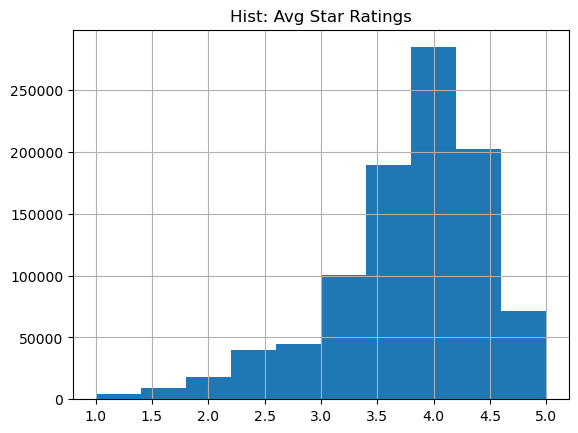

In [13]:
# get a 
plt.title('Hist: Avg Star Ratings')
df['true_avg_stars'].hist();

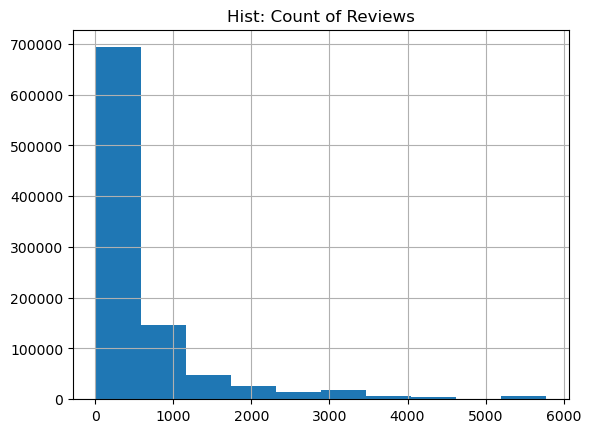

In [14]:
plt.title('Hist: Count of Reviews')
df['count_reviews'].hist(); # outlier here 

In [15]:
word_cloud_negative = []
for doc in [doc.split() for doc in list(df[df['true_avg_stars'] < 3]['preprocessed_text'])]:
    for word in doc: 
        word_cloud_negative.append(word)
        
wc_neg_s = " ".join(word_cloud_negative)

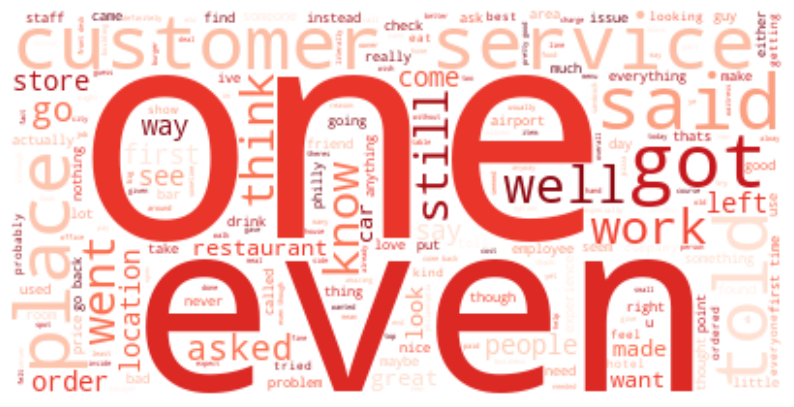

In [16]:
plt.figure(figsize=(10,10))

wc_neg = WordCloud(collocations= True, background_color= 'white', colormap= 'Reds').generate(wc_neg_s)

plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.show();

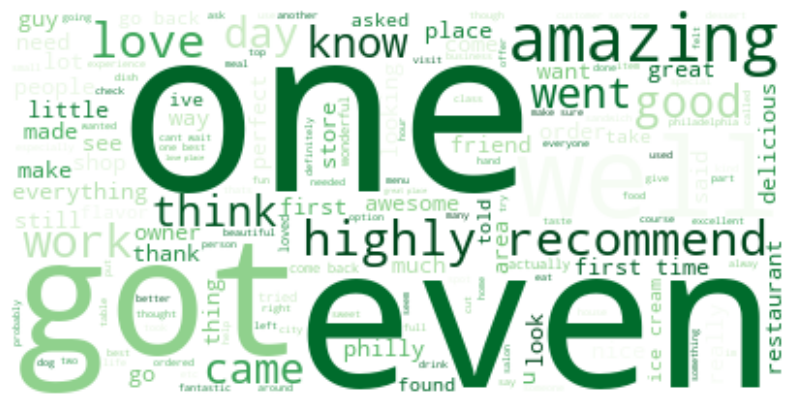

In [17]:
word_cloud_postive = []
for doc in [doc.split() for doc in list(df[df['true_avg_stars'] > 4.5]['preprocessed_text'])]:
    for word in doc: 
        word_cloud_postive.append(word)
        
wc_pos_s = " ".join(word_cloud_postive)

plt.figure(figsize=(10,10))

wc_pos = WordCloud(collocations= True, background_color= 'white', colormap= 'Greens').generate(wc_pos_s)

plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.show();

In [18]:
# remove one and even 

In [19]:
df[df['true_avg_stars'] < 3].shape

(115937, 16)

In [20]:
df[df['true_avg_stars'] > 4.5].shape

(101136, 16)

In [21]:
neg_df_v1 = df[df['true_avg_stars'] < 3]
pos_df_v1 = df[df['true_avg_stars'] > 4.5]

In [22]:
neg_df_v1['label'] = np.zeros(neg_df_v1.shape[0])
pos_df_v1['label'] = np.ones(pos_df_v1.shape[0])

/var/folders/hy/m73nj7zd0f746_my9g1b255h0000gn/T/ipykernel_79546/853905525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df_v1['label'] = np.zeros(neg_df_v1.shape[0])
/var/folders/hy/m73nj7zd0f746_my9g1b255h0000gn/T/ipykernel_79546/853905525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df_v1['label'] = np.ones(pos_df_v1.shape[0])


In [23]:
df_modeling = pd.concat([pos_df_v1, neg_df_v1], axis=0).reset_index()

In [24]:
df_modeling['preprocessed_text'].loc[0]

'short reviewthis place fantastic customer service severely lacking business today many cases feel like im bother truth joes groomsman wedding groom treated u fresh haircut straight razor shave five total guy there impressed joe rush through attentive guyand made experience better basically hung enjoyed experience joe fit right groomsmen customer entered shop clearly created culture camaraderie shop need hair cut enjoyed straight razor shave a first me joe true master craft also great educating process which found interesting shave awesome experience really felt amazing shave experience highly recommended'

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michaelfronda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
######### Unsupervised Approach #########
'''
VADER (Valence Aware Dictionary and sEntiment Reasoner), which assigns 
sentiment scores to words based on their presence in a sentiment lexicon. 
These scores are then aggregated to obtain the sentiment score for a given text.
'''

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

In [27]:
df['sentiment_score'] = df['preprocessed_text'].apply(get_sentiment_score)

In [28]:
df['sentscore_unsup_VADER'] = df['sentiment_score']

In [29]:
val = df[['preprocessed_text', 'sentscore_unsup_VADER', 'true_avg_stars']]
val[val['true_avg_stars'] < 2].describe()

,sentscore_unsup_VADER,true_avg_stars
count,20277.000000,20277.000000
mean,-0.030072,1.620999
std,0.706172,0.262433
min,-0.998200,1.000000
25%,-0.743000,1.466667
50%,-0.077200,1.673684
75%,0.718400,1.850746
max,0.999000,1.986842


In [30]:
# Top 5 words for positive sentiment
positive_reviews = df[df['sentscore_unsup_VADER'] > 0]
positive_text = ' '.join(positive_reviews['preprocessed_text'])
positive_words = pd.Series(positive_text.split()).value_counts().head(5)

In [31]:
positive_words

place    482540
good     471698
food     467268
great    412844
time     328943
Name: count, dtype: int64

In [32]:
# Top 5 words for negative sentiment
negative_reviews = df[df['sentscore_unsup_VADER'] < 0]
negative_text = ' '.join(negative_reviews['preprocessed_text'])
negative_words = pd.Series(negative_text.split()).value_counts().head(5)

In [33]:
negative_words

time       43338
food       41817
place      41241
get        38095
service    35916
Name: count, dtype: int64

In [34]:
def top_words_VADER(text):
    from collections import Counter
    # Calculate sentiment score for each word
    words = text.split()
    word_scores = {word: sid.polarity_scores(word)['compound'] for word in words}
    
    # Separate words into positive and negative categories based on sentiment score
    positive_words = [word for word, score in word_scores.items() if score > 0]
    negative_words = [word for word, score in word_scores.items() if score < 0]
    
    # Get the top 5 positive and negative words
    top_positive_words = Counter(positive_words).most_common(5)
    top_negative_words = Counter(negative_words).most_common(5)
    
    return {'positive_words': top_positive_words, 'negative_words': top_negative_words}


df['top_words_VADER'] = df['preprocessed_text'].apply(top_words_VADER)

In [35]:
df['top_words_VADER']

0         {'positive_words': [('fantastic', 1), ('like',...
1         {'positive_words': [('awesome', 1), ('fantasti...
2         {'positive_words': [('great', 1), ('interested...
3         {'positive_words': [('good', 1), ('like', 1), ...
4         {'positive_words': [('cool', 1), ('clean', 1),...
                                ...                        
964550    {'positive_words': [('relaxation', 1), ('stren...
964551    {'positive_words': [('great', 1), ('welcoming'...
964552    {'positive_words': [('party', 1), ('welcoming'...
964553    {'positive_words': [('love', 1), ('welcoming',...
964554    {'positive_words': [('feeling', 1), ('relaxed'...
Name: top_words_VADER, Length: 964555, dtype: object

In [36]:
# save point
df.to_csv('vader_scores_plus_top_words.csv')

In [37]:
df['top_words_VADER'].loc[123456]

{'positive_words': [('happy', 1),
  ('awesome', 1),
  ('compassionate', 1),
  ('enjoyed', 1),
  ('great', 1)],
 'negative_words': [('restriction', 1), ('po', 1)]}

In [38]:
df['sentscore_unsup_VADER'].loc[123456]

0.9921

In [43]:
!python --version

Python 3.11.5


python(73642) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df['preprocessed_text']).toarray()
y = df['label']

In [ ]:
# Define a simple neural network model
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.fc(output[-1, :, :])  # Take the output of the last timestep
        return output

# Custom dataset class for PyTorch
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Tokenize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
input_size = X_train.shape[1]  # Size of input features
hidden_size = 128  # Size of hidden layer
output_size = 1  # Output sentiment score

# Initialize the model, loss function, and optimizer
model = SentimentClassifier(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch DataLoader
train_dataset = TextDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.long))
    test_loss = criterion(test_outputs.squeeze(), torch.tensor(y_test, dtype=torch.float))
    print(f'Test Loss: {test_loss.item():.4f}')

# Get sentiment scores for all reviews
sentiment_scores = model(torch.tensor(X, dtype=torch.long)).squeeze().detach().numpy()

# Add sentiment scores to DataFrame
df['sentiment_score'] = sentiment_scores

In [129]:
test_vectorizer = df[['preprocessed_text']].sample(5)

In [140]:
test_vectorizer['preprocessed_text']

4705      huge selection house beer made premises ton gr...
241412    bit pricey food delicious filling got guacamol...
931407    happened white dog cafe first time friend dans...
604769    pennsport beer boutique great draft bottle sel...
220095    place perfect dom always front desk everyone c...
Name: preprocessed_text, dtype: object

In [155]:
count_vectorizer = CountVectorizer()
c = count_vectorizer.fit_transform(list(test_vectorizer['preprocessed_text']))
# c = count_vectorizer.transform(test_vectorizer)

In [156]:
c.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [157]:
count_vectorizer.get_feature_names_out()

array(['affordable', 'again', 'always', 'anything', 'appetizer',
       'arancini', 'area', 'asked', 'back', 'bad', 'ball', 'bar',
       'barely', 'beer', 'better', 'birthday', 'bit', 'bolognese',
       'bottle', 'boutique', 'boys', 'bread', 'bring', 'burger', 'buy',
       'cafe', 'call', 'car', 'cheaper', 'cheese', 'chips', 'city',
       'close', 'combo', 'cook', 'cooked', 'could', 'covered', 'dans',
       'day', 'deck', 'definitely', 'delicious', 'deserves', 'desk',
       'different', 'dinner', 'disappointed', 'dog', 'dom', 'door',
       'draft', 'egg', 'enjoy', 'entrees', 'everyone', 'everything',
       'exactly', 'expect', 'expensive', 'explains', 'extremely', 'fast',
       'favorite', 'filled', 'filling', 'first', 'flat', 'food', 'four',
       'fried', 'friend', 'friendly', 'front', 'garden', 'girlfriend',
       'given', 'go', 'going', 'got', 'great', 'group', 'guacamole',
       'guacs', 'happened', 'hate', 'healthy', 'her', 'here', 'high',
       'house', 'housemade',

In [154]:
list(test_vectorizer['preprocessed_text'])

['huge selection house beer made premises ton great appetizer entrees healthy option well arancini rice ball great starter house salad tried flat bread pizzas meat favorite burger housemade beer cheese fried egg solid',
 'bit pricey food delicious filling got guacamole sampler which yummy great way try different guacs kept refilling chips combo wonderful filling got steak shrimp everything seasoned well piled top group  got  combo filled u much food left over',
 'happened white dog cafe first time friend dans st birthday great time last time last  summer terrible girlfriend ordered meadow run spring lamb  barely meat plus asked welldone cooked rare ordered spicy lamb bolognese  nothing spectacular price mostly rigatoni noodle much seasoning know could cook better expensive worthless dinner extremely disappointed never again go next door new deck tavern cheaper specials',
 'pennsport beer boutique great draft bottle selection dog friendly nice beer garden area outside multiple picnic ta

## Test / Processing Below

In [86]:
' '.join([lemmatizer.lemmatize(word) for word in "i'm hooked of Foods are great yummy friendly".split()])

"i'm hooked of Foods are great yummy friendly"

In [84]:
' '.join([stemmer.stem(word) for word in "i'm hooked of Foods are great friendly".split()])

"i'm hook of food are great friendli"

In [68]:
' '.join([lemmatizer.lemmatize(word) for word in test_text.split()])

"Omg I'm hooked on the dandan noodles!! Yum yum great new place in Rox! Friendly kind staff and super yummy food"

In [113]:
text_alpha

'omg im hooked dandan noodles yum yum great new place rox friendly kind staff super yummy food'

In [ ]:
def remove_stop_words(s):
    filtered_data = [[word for word in sentence if word not in stop_words] for sentence in s]
    return filtered_data

